# Linear Regression 

## import library

In [50]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

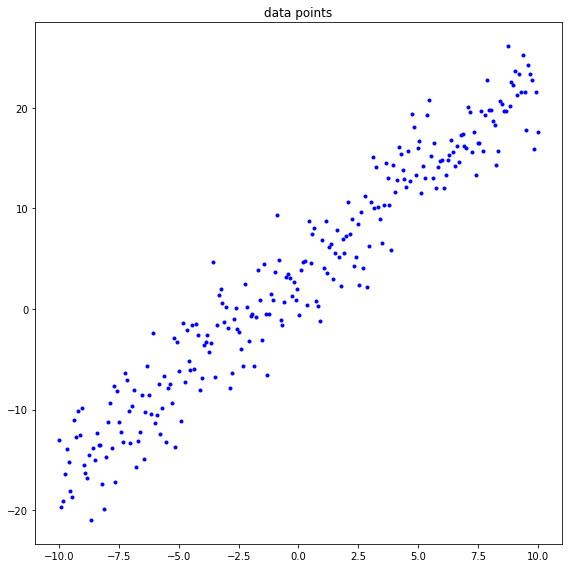

(256,)
(256,)


In [51]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()
print(x.shape)
print(y.shape)

## compute the loss function

In [52]:
def compute_loss(x, y, theta0, theta1):
    tmp = x*theta1 + theta0 - y
    loss = np.linalg.norm(tmp)**2 / (2*len(x))
    return loss

## compute the gradient for each model parameter

In [53]:
def compute_gradient_theta0(x, y, theta0, theta1):
    dL = np.sum(x*theta1 + theta0 - y) / len(x)

    return dL

In [54]:
def compute_gradient_theta1(x, y, theta0, theta1):

    dL = np.sum( (x*theta1 + theta0 - y) * x ) / len(x)
    return dL

## gradient descent for each model parameter

In [55]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x,y,theta0,theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x,y,theta0,theta1)
    loss    = compute_loss(x,y,theta0,theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

print(theta0_iteration[-1], theta1_iteration[-1],loss_iteration[-1])

iteration =    0, loss = 38.92372
iteration =    1, loss = 22.45805
iteration =    2, loss = 15.14235
iteration =    3, loss = 11.86256
iteration =    4, loss = 10.36354
iteration =    5, loss = 9.65082
iteration =    6, loss = 9.28587
iteration =    7, loss = 9.07528
iteration =    8, loss = 8.93374
iteration =    9, loss = 8.82363
iteration =   10, loss = 8.72832
iteration =   11, loss = 8.64046
iteration =   12, loss = 8.55681
iteration =   13, loss = 8.47590
iteration =   14, loss = 8.39708
iteration =   15, loss = 8.32004
iteration =   16, loss = 8.24463
iteration =   17, loss = 8.17075
iteration =   18, loss = 8.09837
iteration =   19, loss = 8.02743
iteration =   20, loss = 7.95791
iteration =   21, loss = 7.88977
iteration =   22, loss = 7.82299
iteration =   23, loss = 7.75754
iteration =   24, loss = 7.69339
iteration =   25, loss = 7.63052
iteration =   26, loss = 7.56890
iteration =   27, loss = 7.50851
iteration =   28, loss = 7.44932
iteration =   29, loss = 7.39130
itera

In [56]:
f = x*theta1 + theta0
print(f.shape)

(256,)


## plot the results

In [57]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')

    plt.plot(x,y,'o', color = 'blue')
    plt.plot(x,f,'-', color = 'red')
    plt.tight_layout()
    plt.show()

In [58]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot(range(1,len(loss_iteration)+1), loss_iteration, '-', color = 'red')
    
    plt.tight_layout()
    plt.show()

In [59]:
def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.plot(range(1,len(theta0_iteration) + 1), theta0_iteration, 'o', color = 'blue')
    plt.plot(range(1,len(theta1_iteration) + 1), theta1_iteration, 'o', color = 'green')
    
    plt.tight_layout()
    plt.show()

In [60]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

#len(X0) = 200
grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
#grid_theta1을 x의 길이(즉 학습데이터쌍의 길이만큼) 쌓아올려, (256,200,200)으로 만들어줌.
grid_theta1_tile = np.tile(grid_theta1,(len(x),1,1))
#x를 256,1의 열벡터로 만들어줌
x_col_vector = x.reshape(len(x),1)
# x의 256개 원소에 대하여, 하나의 원소마다 200x200의 배열을 만들어, 총 256,200,200 의 shape으로 만들어줌
x_tile= np.tile(x_col_vector, (1,1,40000)).reshape(len(x),200,200)

# 저절로 Broadcasting 되므로 , x_tile와 grid_theta1_tile을 곱하고, 200,200 shape의 grid_theta0을 더해준다.
loss_tmp = x_tile * grid_theta1_tile + grid_theta0

# y가 (256,)의 shape을 갖고있으므로, 각 원소마다 200,200의 array를 만들어, 총 256,200,200의 array를 만들어준다.
y_col_vector = y.reshape(len(y),1)
y_tile = np.tile(y_col_vector, (1,1,40000)).reshape(len(y),200,200)

loss_tmp2 = loss_tmp - y_tile
#loss_tmp2 , 즉, 256,20,20 shape에서, 같은 위치의 256개의 원소끼리 제곱합 (norm) (axis = 0) 하고, 2*256으로 나누어 200,200 shape으로 만들면 최종 loss 
grid_loss = np.sum(loss_tmp2**2, axis=0) / (len(x)*2)


def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    ax = Axes3D(fig)
    # 그래프 격자 간격 설정 
    ax.set_xticks(X0,minor=True)
    ax.set_yticks(X1,minor=True)
# 그래프 격자 major, minor 각각 설정
    ax.grid(which="major", alpha=0.8)
    ax.grid(which='minor', alpha=0.2)
    ax.plot_surface(grid_theta0,grid_theta1,grid_loss, cmap='plasma')
    
    ax.set_xlabel('Theta_0')
    ax.set_ylabel('Theta_1')
    ax.set_zlabel('Loss')    

    plt.tight_layout()
    plt.show()

## plot_loss_surface_Additional_Explanation

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


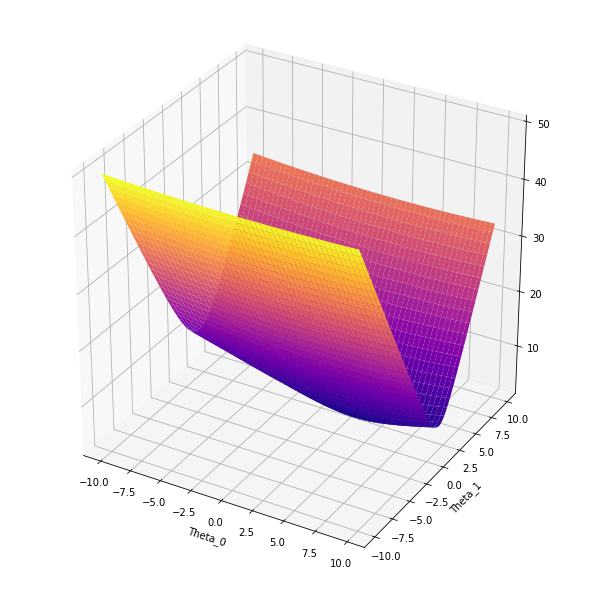

In [61]:
fig = plt.figure(figsize=(8,8))
plt.title('loss surface')
ax = Axes3D(fig)
#그래프 상 가로로 보이는 부분이 x축이므로, theta0이 들어가야하고, 세로가 y축이므로, theta1이 들어가야한다.
ax.plot_surface(grid_theta0,grid_theta1,grid_loss**0.5, cmap='plasma')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')

plt.tight_layout()
plt.show()

## * To make the slope of grid_loss more visible, I put a root operation on grid_loss.

### @ Looking at the graph above, the slope of theta0 is very slow compared to theta1 axis, but it can be seen that the theta0 axis also has a slope and converges to one point. 
### @ In other words, it can be seen that no matter which point on the graph you start, you can gradient descent to one point

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

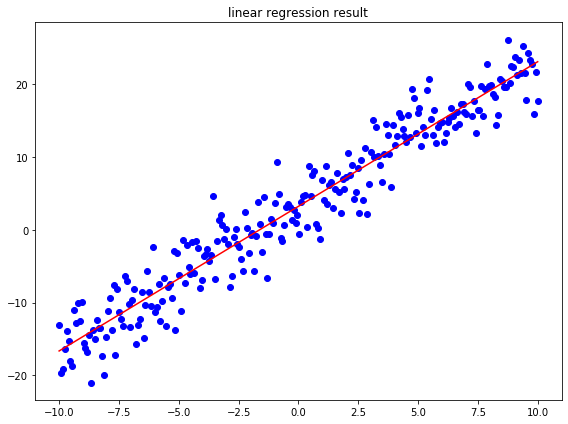

In [62]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

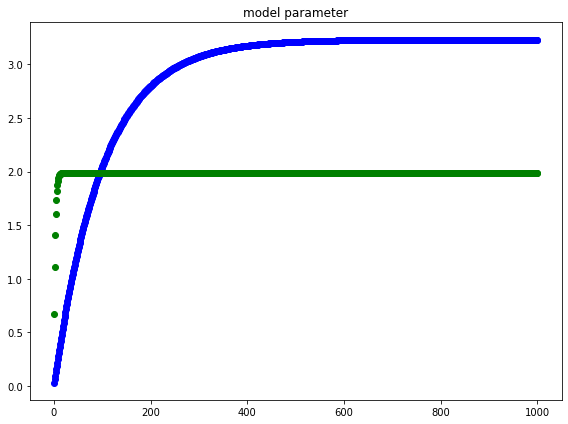

In [63]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

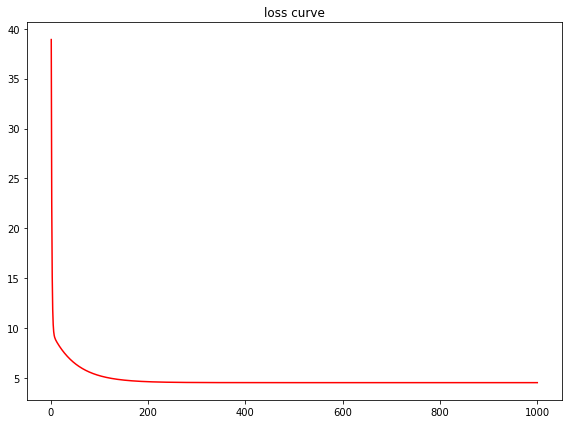

In [64]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


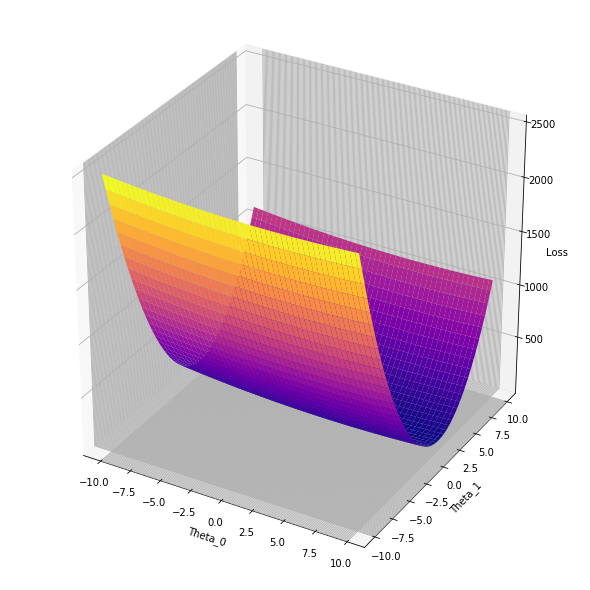

In [65]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)